# Tutorial 2 -  i) Oscillation analysis of residual load
## Step 1: Import FANFARE source code

In [1]:
import source as sc

submodule "power_class" imported
fanfare submodule "aux" imported
fanfare module import complete


## Step 2: Load data
Here we load a dataset downloaded from Energidataservice.dk (see Tutorial 0):

In [2]:
data_ob = sc.PowerData(load=True,file_name='energinet_all',year='2018')

Loading previously stored dataset
Could not estimate residual load, one of the following columns were missing: 
GrossCon, WindPowerProd, SolarPowerProd
(if data_type = "energinet", this is fine, ResLoad_DK, ResLoad_DK1, ResLoad_DK2 should be there)


## Step 3: Decide on frequency setup
Determine the frequency intervals in terms of timescales in hours, and write an equal number of labels to go with them:

In [3]:
duration_cuts = [[0.25,5],[5,24],[24,7*24],[7*24,3*30*24],[3*30*24,1e6]] # hours
labels = ['< 5 hrs',\
          '5 - 24 hrs',\
          '24 hrs - 1 week',\
          '1 week - 3 months',\
          '> 3 months']
data_ob.SetFrequencySetup(duration_cuts=duration_cuts,labels=labels)

## Step 4: Integrate iDFT and plot in pie chart

Calculating total iFFT
Calculating FFT
Number of datapoints: 8759
Time step used for FFT: 3600.0 sec
Now doing frequency cut: 2.78e-05 to 5.56e-04 Hz
Frequency cut contains 18.77 % of FFT power (real part) - now calculating iFFT for this cut
done!
------
Years of data with current selection: 1.00
Already an iFFT calculated
Now doing frequency cut: 5.79e-06 to 2.78e-05 Hz
Frequency cut contains 36.82 % of FFT power (real part) - now calculating iFFT for this cut
done!
------
Years of data with current selection: 1.00
Already an iFFT calculated
Now doing frequency cut: 8.27e-07 to 5.79e-06 Hz
Frequency cut contains 32.31 % of FFT power (real part) - now calculating iFFT for this cut
done!
------
Years of data with current selection: 1.00
Already an iFFT calculated
Now doing frequency cut: 6.43e-08 to 8.27e-07 Hz
Frequency cut contains 10.55 % of FFT power (real part) - now calculating iFFT for this cut
done!
------
Years of data with current selection: 1.00
Already an iFFT calculated
Now

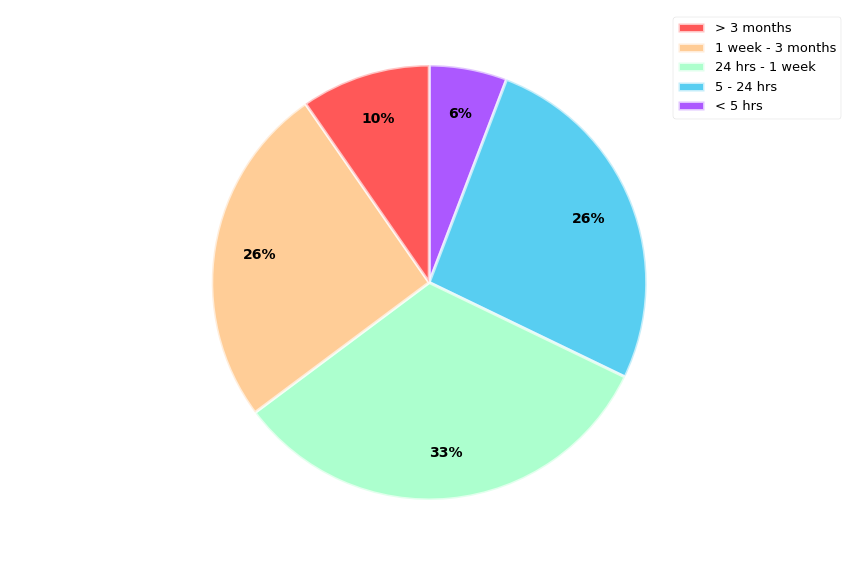

In [4]:
fluc,int_power = data_ob.GetFluctuations(col_name='ResLoad_DK')
data_ob.PlotPie(int_power=int_power,alpha=0.65,radius=1,width=1,legend=True,fig_name='pie_chart_DK')